In [1]:
!module load gcc/8.2.0 python_gpu/3.10.4 open3d/0.9.0 boost/1.74.0 eth_proxy


The following have been reloaded with a version change:
  1) gcc/4.8.5 => gcc/8.2.0



In [3]:
!pip install matplotlib

     |████████████████████████████████| 11.5 MB 4.9 MB/s                      | 2.4 MB 4.9 MB/s eta 0:00:02
     |████████████████████████████████| 14.8 MB 25.8 MB/s               |███████▎                        | 3.4 MB 25.8 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 5.1 MB/s             
     |████████████████████████████████| 1.1 MB 97.4 MB/s            
     |████████████████████████████████| 3.1 MB 102.5 MB/s            ��██████████▋              | 1.7 MB 102.5 MB/s eta 0:00:01


In [36]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
exp_name = 'train_saga_female'
log_file = './logs/GraspPose/{}/{}_epoch0_40.log'.format(exp_name,exp_name)

with open(log_file) as f:
    f = f.readlines()
markers_train_auc = []
markers_eval_auc = []
object_train_auc = []
object_eval_auc = []


eval_loss_dict = defaultdict(list)

for line in f:
    line = line.split(' ')
    if len(line) > 8 and line[7] == "object":
        train_auc = float(line[9][:-1])
        eval_auc = float(line[12][:-1])
        object_train_auc.append(train_auc)
        object_eval_auc.append(eval_auc)
    if len(line) > 8 and line[7] == 'markers':
        train_auc = float(line[9][:-1])
        eval_auc = float(line[12][:-1])
        markers_train_auc.append(train_auc)
        markers_eval_auc.append(eval_auc)
    if len(line) > 11 and line[10] == "00113":
        eval_loss_dict['loss_total'].append(float(line[15][3:-1]))
        eval_loss_dict['loss_kl'].append(float(line[19]))
        eval_loss_dict['loss_object_contact_rec'].append(float(line[23]))
        eval_loss_dict['loss_markers_contact_rec'].append(float(line[27]))
        eval_loss_dict['loss_marker_rec'].append(float(line[31]))
        eval_loss_dict['loss_consistency_o2h'].append(float(line[35]))
        eval_loss_dict['loss_consistency_h2o'].append(float(line[39][:-1]))

assert len(markers_train_auc)==len(markers_eval_auc)==len(object_train_auc)==len(object_eval_auc)
epochs = np.arange(len(markers_train_auc)) + 1

/cluster/scratch/yaqqin/venvs/saga_venv/lib64/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  if sys.path[0] == '':


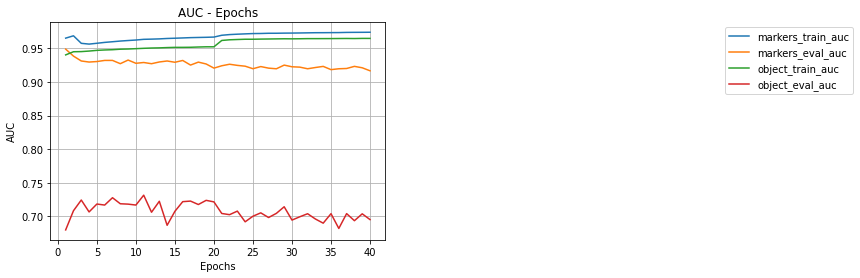

In [34]:
ts = 40
plt.plot(epochs[:ts], markers_train_auc[:ts], label="markers_train_auc")
plt.plot(epochs[:ts], markers_eval_auc[:ts], label="markers_eval_auc")
plt.plot(epochs[:ts], object_train_auc[:ts], label="object_train_auc")
plt.plot(epochs[:ts], object_eval_auc[:ts], label="object_eval_auc")

plt.legend(bbox_to_anchor=(2, 1), loc='upper left')
plt.xlabel("Epochs")
plt.ylabel("AUC")
plt.title("AUC - Epochs")
plt.grid()
plt.tight_layout()
plt.show()

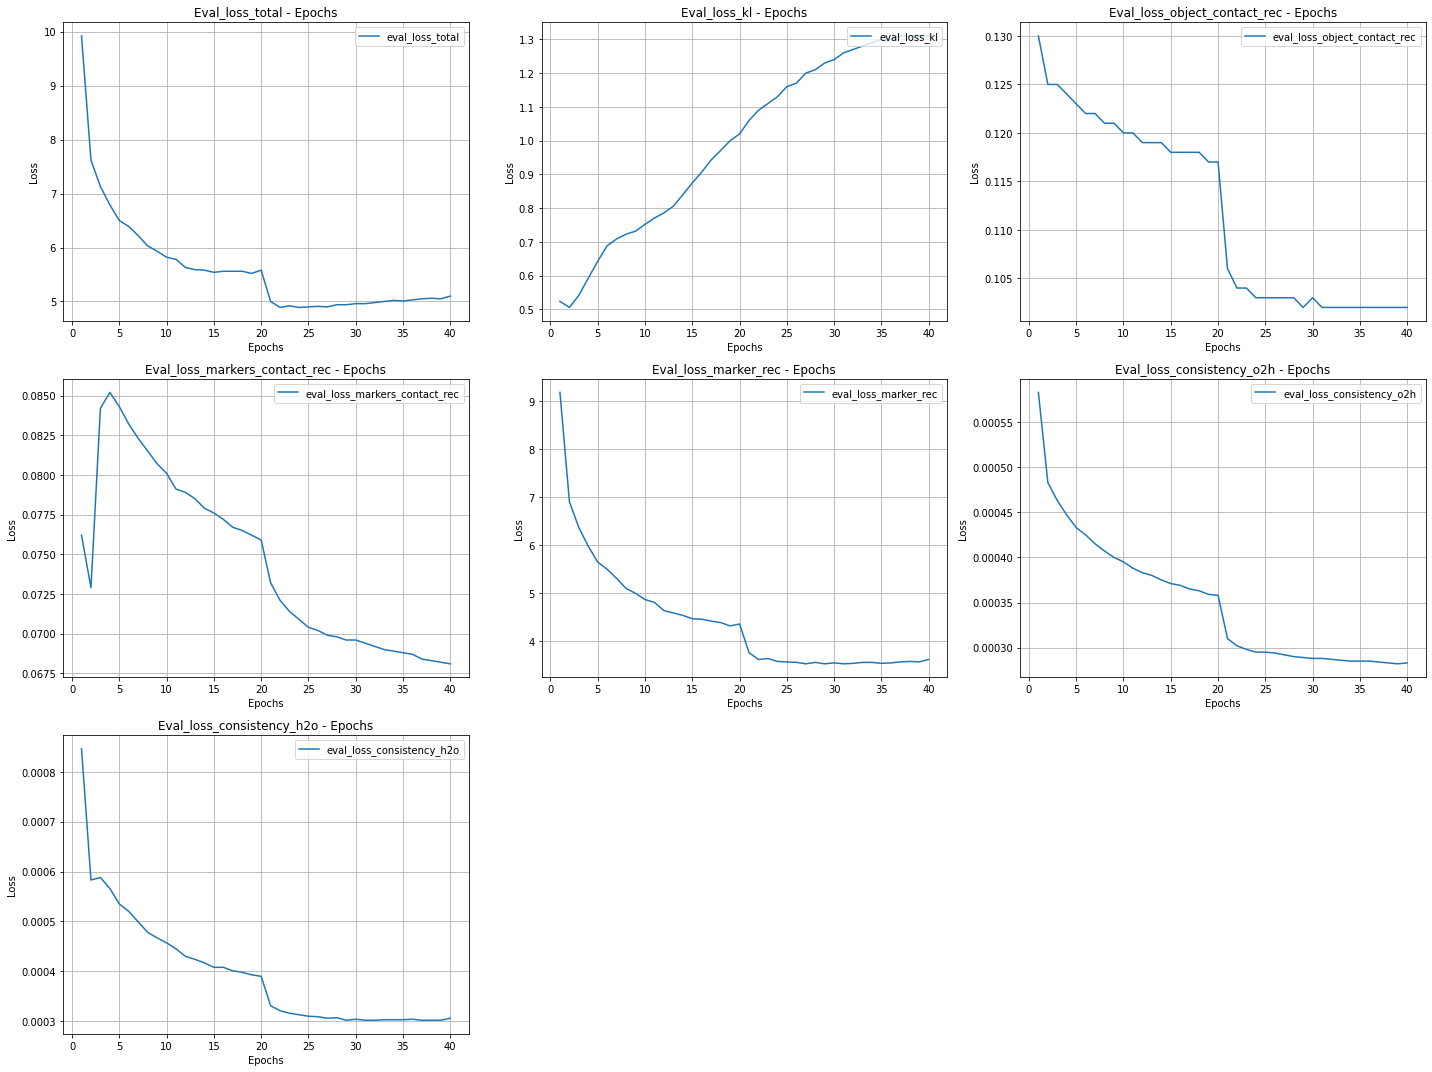

In [49]:
ts = 40
loss_typle = list(eval_loss_dict.keys())
plt.figure(figsize=(20,15))
for i in range(1, 8):
    loss_name = loss_typle[i-1]
    plt.subplot(3, 3, i)
    plt.plot(epochs[:ts], eval_loss_dict[loss_name][:ts], label=f"eval_{loss_name}")
    plt.legend(loc='upper right')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title(f"Eval_{loss_name} - Epochs")
    plt.grid()
    plt.tight_layout()
plt.show()